## <center>IT353 - Information Assurance and Security</center>
## <center>Course Project Mid Semester Evaluation</center>
## Group Members

 > Yuvraj Singh Jadon  201IT268<br>
 > Harshita BL  <br>
 > Kalpana Talvar
 

## The aim of this work is to predict the type of cyber-attacks, and more precisely, the subcategories of DoS and DDoS attacks.
## The first configuration is named the "Basic Approach" and the second one is the "Looking- Back Approach" ("LB Approach"). 
## We have chosed the BOT-IOT dataset you can visit the dataset using the below link https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2F10-best%20features


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score

# Load preprocessed training and testing datasets
train_data = pd.read_csv('Training.csv')
test_data = pd.read_csv('Testing.csv')
unwanted_features = ['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'category','subcategory']
train_data.drop(columns=unwanted_features, inplace=True)
test_data.drop(columns=unwanted_features, inplace=True)


DT_acc =[]
DT_kappa =[]

RF_acc =[] 
RF_kappa =[] 

KNN_acc =[] 
KNN_kappa =[] 

MLP_acc =[] 
MLP_kappa =[]





# Set Looking-Back time step p
for p in range (0,5,1):
    # Extract previous attack types for each sample in the training data
    train_attack_history = []
    for i in range(p, len(train_data)):
        attack_history = tuple(train_data['attack'][i-p:i])
        train_attack_history.append(attack_history)
    train_data = train_data.iloc[p:]
    train_data['attack_history'] = train_attack_history

    # Extract previous attack types for each sample in the testing data
    test_attack_history = []
    for i in range(p, len(test_data)):
        attack_history = tuple(test_data['attack'][i-p:i])
        test_attack_history.append(attack_history)
    test_data = test_data.iloc[p:]
    test_data['attack_history'] = test_attack_history

    # Split features and target for training and testing datasets
    X_train = train_data.drop(['attack', 'attack_history'], axis=1)
    y_train = train_data['attack']
    X_test = test_data.drop(['attack', 'attack_history'], axis=1)
    y_test = test_data['attack']
    y_true = y_test
    print(f"\033[1;31m When {p} looking back steps are taken. \033[0m")

    
    # Fit the Decision Tree classifier on the training data
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Evaluate the model using accuracy score, f1 score, and kappa score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)

    
    # Print the evaluation scores
    print(f"\033[1;31m Evolution scores using DecisionTreeClassifier \033[0m")
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Kappa Score:', kappa)
    DT_acc.append(accuracy)
    DT_kappa.append(kappa)
    
    
    
    from sklearn.ensemble import RandomForestClassifier
    # Create the Random Forest model
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model on the training set
    rfc.fit(X_train, y_train)

    # Test the model on the testing set
    y_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_pred, y_true)

    print('\033[1;31m' + 'RandomForestClassifier' + '\033[0m')
    print("Accuracy:", accuracy)
    print("F1-measure:", f1)
    RF_acc.append(accuracy)

    kappa = cohen_kappa_score(y_true, y_pred)

    # Print kappa coefficient
    print("Kappa coefficient:", kappa)
    RF_kappa.append(kappa)
    
    
    from sklearn.neighbors import KNeighborsClassifier
    # Create the KNN model with k=2
    knn = KNeighborsClassifier(n_neighbors=2)

    # Train the model on the training set
    knn.fit(X_train, y_train)

    # Test the model on the testing set
    y_pred = knn.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)

    # Print the evaluation metrics
    print('\033[1;31m' + 'KNeighborsClassifier' + '\033[0m')

    print("Accuracy:", accuracy)
    KNN_acc.append(accuracy) 
    print("F1-score:", f1)
    print("Kappa coefficient:", kappa)
    KNN_kappa.append(kappa) 
    
    
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier()

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp.predict(X_test)


    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_pred, y_true)

    print('\033[1;31m' + 'MLPClassifier' + '\033[0m')
    print(f"Accuracy score: {acc}")
    MLP_acc.append(acc)
    print("F1-measure:", f1)

    kappa = cohen_kappa_score(y_true, y_pred)

    # Print kappa coefficient
    print("Kappa coefficient:", kappa)
    MLP_kappa.append(kappa)

 When 0 looking back steps are taken. 
 Evolution scores using DecisionTreeClassifier 
Accuracy: 0.9999904593808138
F1 Score: 0.9999903452748313
Kappa Score: 0.966502408775353
RandomForestClassifier
Accuracy: 0.9999904593808138
F1-measure: 0.9999952290173889
Kappa coefficient: 0.9661788093532448


/Users/mymac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
Accuracy: 0.9999373045024907
F1-score: 0.8925076883254683
Kappa coefficient: 0.7850153766509367
MLPClassifier
Accuracy score: 0.9998528018754131
F1-measure: 0.9999263945172093
Kappa coefficient: 0.15620962280102424
 When 1 looking back steps are taken. 
 Evolution scores using DecisionTreeClassifier 
Accuracy: 0.9999890964203548
F1 Score: 0.9999889391794816
Kappa Score: 0.9615330135134804
RandomForestClassifier
Accuracy: 0.9999890964203548
F1-measure: 0.9999945474447282
Kappa coefficient: 0.9611596042128604


/Users/mymac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
Accuracy: 0.9999373044170401
F1-score: 0.8925076883040994
Kappa coefficient: 0.7850153766081989
MLPClassifier
Accuracy score: 0.9998364463053221
F1-measure: 0.9999182152384095
Kappa coefficient: 0.15486882041029626
 When 2 looking back steps are taken. 
 Evolution scores using DecisionTreeClassifier 
Accuracy: 0.9999890963906327
F1 Score: 0.9999889391493308
Kappa Score: 0.9615330134986275
RandomForestClassifier
Accuracy: 0.9999890963906327
F1-measure: 0.9999945474298629
Kappa coefficient: 0.9611596041980176


/Users/mymac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
Accuracy: 0.999937304246138
F1-score: 0.8925076882613614
Kappa coefficient: 0.7850153765227229
MLPClassifier
Accuracy score: 0.9998105497872434
F1-measure: 0.9999052643703387
Kappa coefficient: 0.1471538033468437
 When 3 looking back steps are taken. 
 Evolution scores using DecisionTreeClassifier 
Accuracy: 0.9999904593027931
F1 Score: 0.9999903451958776
Kappa Score: 0.9665024087363538
RandomForestClassifier
Accuracy: 0.999991822259537
F1-measure: 0.9999959105500992
Kappa coefficient: 0.9711497601072611


/Users/mymac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
Accuracy: 0.9999373039897833
F1-score: 0.892507688197254
Kappa coefficient: 0.7850153763945081
MLPClassifier
Accuracy score: 0.9998200897098128
F1-measure: 0.9999100352907019
Kappa coefficient: 0.15376862622639997
 When 4 looking back steps are taken. 
 Evolution scores using DecisionTreeClassifier 
Accuracy: 0.9999904592507786
F1 Score: 0.9999903451432411
Kappa Score: 0.966502408710354
RandomForestClassifier
Accuracy: 0.9999918222149531
F1-measure: 0.9999959105278009
Kappa coefficient: 0.9711497600849813


/Users/mymac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
Accuracy: 0.9999373036479736
F1-score: 0.8925076881117766
Kappa coefficient: 0.7850153762235534
MLPClassifier
Accuracy score: 0.9997573923769414
F1-measure: 0.9998786793221854
Kappa coefficient: 0.127329951278899


In [14]:
print("DT_acc:", DT_acc)
print("DT_kappa:", DT_kappa)
print("RF_acc:", RF_acc)
print("RF_kappa:", RF_kappa)
print("KNN_acc:", KNN_acc)
print("KNN_kappa:", KNN_kappa)
print("MLP_acc:", MLP_acc)
print("MLP_kappa:", MLP_kappa)


DT_acc: [0.9999904593808138, 0.9999890964203548, 0.9999890963906327, 0.9999904593027931, 0.9999904592507786]
DT_kappa: [0.966502408775353, 0.9615330135134804, 0.9615330134986275, 0.9665024087363538, 0.966502408710354]
RF_acc: [0.9999904593808138, 0.9999890964203548, 0.9999890963906327, 0.999991822259537, 0.9999918222149531]
RF_kappa: [0.9661788093532448, 0.9611596042128604, 0.9611596041980176, 0.9711497601072611, 0.9711497600849813]
KNN_acc: [0.9999373045024907, 0.9999373044170401, 0.999937304246138, 0.9999373039897833, 0.9999373036479736]
KNN_kappa: [0.7850153766509367, 0.7850153766081989, 0.7850153765227229, 0.7850153763945081, 0.7850153762235534]
MLP_acc: [0.9998528018754131, 0.9998364463053221, 0.9998105497872434, 0.9998200897098128, 0.9997573923769414]
MLP_kappa: [0.15620962280102424, 0.15486882041029626, 0.1471538033468437, 0.15376862622639997, 0.127329951278899]


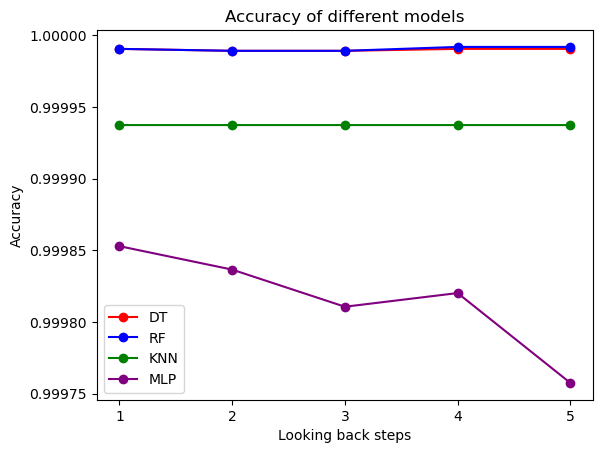

In [18]:
import matplotlib.pyplot as plt

DT_acc = [0.9999904593808138, 0.9999890964203548, 0.9999890963906327, 0.9999904593027931, 0.9999904592507786]
RF_acc = [0.9999904593808138, 0.9999890964203548, 0.9999890963906327, 0.999991822259537, 0.9999918222149531]
KNN_acc = [0.9999373045024907, 0.9999373044170401, 0.999937304246138, 0.9999373039897833, 0.9999373036479736]
MLP_acc = [0.9998528018754131, 0.9998364463053221, 0.9998105497872434, 0.9998200897098128, 0.9997573923769414]

x = range(6)
plt.plot(x[1:], DT_acc, '-o', label='DT', color='red')
plt.plot(x[1:], RF_acc, '-o', label='RF', color='blue')
plt.plot(x[1:], KNN_acc, '-o', label='KNN', color='green')
plt.plot(x[1:], MLP_acc, '-o', label='MLP', color='purple')

plt.xticks(x[1:])
plt.xlabel('Looking back steps')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')

plt.legend()
plt.show()


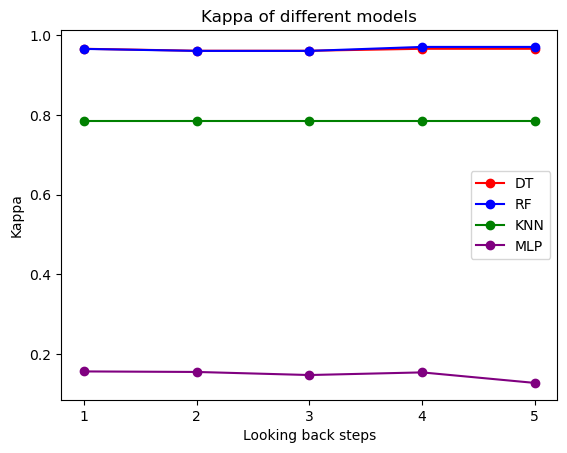

In [19]:
import matplotlib.pyplot as plt

DT_kappa = [0.966502408775353, 0.9615330135134804, 0.9615330134986275, 0.9665024087363538, 0.966502408710354]
RF_kappa = [0.9661788093532448, 0.9611596042128604, 0.9611596041980176, 0.9711497601072611, 0.9711497600849813]
KNN_kappa = [0.7850153766509367, 0.7850153766081989, 0.7850153765227229, 0.7850153763945081, 0.7850153762235534]
MLP_kappa = [0.15620962280102424, 0.15486882041029626, 0.1471538033468437, 0.15376862622639997, 0.127329951278899]

x = range(6)
plt.plot(x[1:], DT_kappa, '-o', label='DT', color='red')
plt.plot(x[1:], RF_kappa, '-o', label='RF', color='blue')
plt.plot(x[1:], KNN_kappa, '-o', label='KNN', color='green')
plt.plot(x[1:], MLP_kappa, '-o', label='MLP', color='purple')

plt.xticks(x[1:])
plt.xlabel('Looking back steps')
plt.ylabel('Kappa')
plt.title('Kappa of different models')

plt.legend()
plt.show()
